# GeoPandas
In this notebook, we will look at GeoPandas and how we can use it to visualize our OSM and GADM data.

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-qjump7ec because the default path (/home/rbanquerigo/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


We first establish a connection to our database

In [2]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

## Handling PostGIS Queries and GeoPandas Dataframe

Previously, we used pandas to read our sql queries through pd.read_sql. For GeoPandas, we use gpd.read_postgis

In [3]:
gpd.read_postgis?

In [4]:
#Lets query our gadm map first and store it as our ph_shp
ph_shp = gpd.read_postgis(""" 
SELECT * FROM gadm.ph
""", con=conn, geom_col='geom')
ph_shp

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ..."
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.78956 17.41699, 120.78922 ..."
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.92917 17.41307, 120.92464 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1640,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.9_1,Naga,None,None,Bayan|Munisipyo,Municipality,98309,PH.ZS.NG,"MULTIPOLYGON (((122.77500 7.76833, 122.77528 7..."
1643,1645,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.14_1,Talusan,None,None,Bayan|Munisipyo,Municipality,98314,PH.ZS.TL,"MULTIPOLYGON (((122.91917 7.34111, 122.91861 7..."
1644,1641,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.10_1,Olutanga,None,None,Bayan|Munisipyo,Municipality,98310,PH.ZS.OU,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7..."
1645,1642,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.11_1,Payao,None,None,Bayan|Munisipyo,Municipality,98311,PH.ZS.PY,"MULTIPOLYGON (((122.69195 7.46229, 122.69139 7..."


<AxesSubplot:>

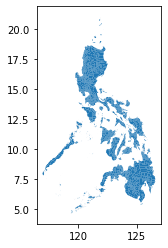

In [5]:
# Using GeoPandas, we can immediately visualize our object using .plot()
ph_shp.plot()

<AxesSubplot:>

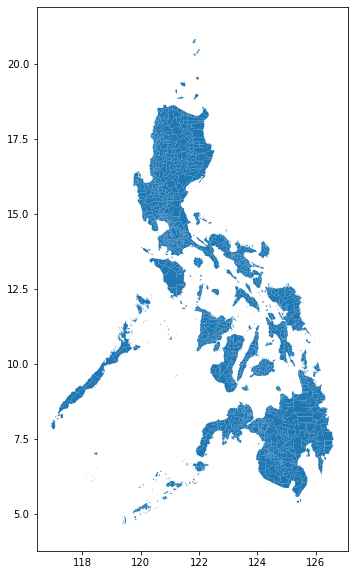

In [6]:
# GeoPandas uses matplotlib to visualize our map so we can use our matplotlib parameters such as figsize
ph_shp.plot(figsize=(10, 10))


In [7]:
# Now let's read our osm points as mm_pts. Filter by looking at points insde 'Metropolitan Manila' and amenity != 'None'
mm_pts = gpd.read_postgis(""" 
SELECT p.* FROM ph_point as p
INNER JOIN gadm.ph as g
ON ST_WITHIN(p.way, g.geom)
WHERE 
p.amenity != 'None'
AND
g.name_1 = 'Metropolitan Manila'
""", con=conn, geom_col='way')
mm_pts

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,1323171902,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06504 14.53979)
1,5055079422,None,None,None,None,None,None,None,nightclub,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06733 14.53969)
2,255058348,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06861 14.53961)
3,1323171838,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06228 14.54403)
4,255071432,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06374 14.54548)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14909,4102699590,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (120.99323 14.73031)
14910,4771230923,None,None,Lot 20,None,None,None,None,car_rental,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01211 14.72981)
14911,5601567148,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01246 14.73250)
14912,4607797789,None,None,None,None,None,None,None,shelter,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01159 14.73729)


<AxesSubplot:>

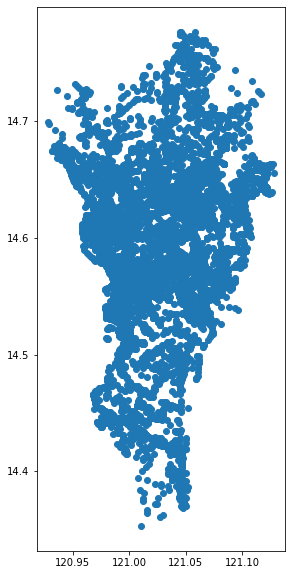

In [8]:
# Now lets visualize our mm_pts
mm_pts.plot(figsize=(10, 10))

<AxesSubplot:>

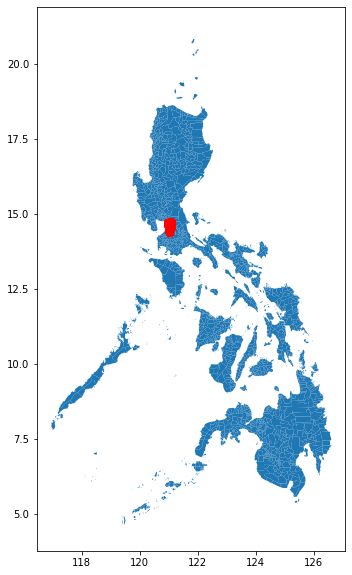

In [9]:
# Plotting our two objects together
ax = ph_shp.plot(figsize=(10, 10))
mm_pts.plot(ax=ax, color='red')

<AxesSubplot:>

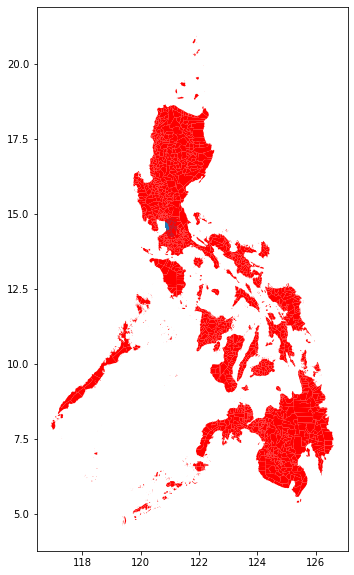

In [10]:
ax = mm_pts.plot(figsize=(10, 10))
ph_shp.plot(ax=ax, color='red')

<AxesSubplot:>

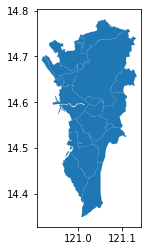

In [11]:
# Notice that we really can't see our points. We can use pandas functions to limit our scope to Metro Manila, mm_shp
mm_shp = ph_shp[ph_shp.name_1=='Metropolitan Manila']
mm_shp.plot()

<AxesSubplot:>

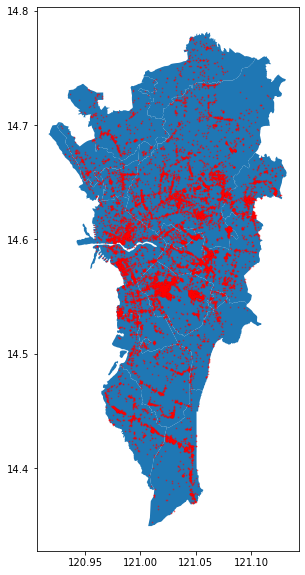

In [12]:
# Plotting our two objects together
ax = mm_shp.plot(figsize=(10, 10))
mm_pts.plot(ax=ax, color='red', markersize=.5, alpha=0.5)

<AxesSubplot:>

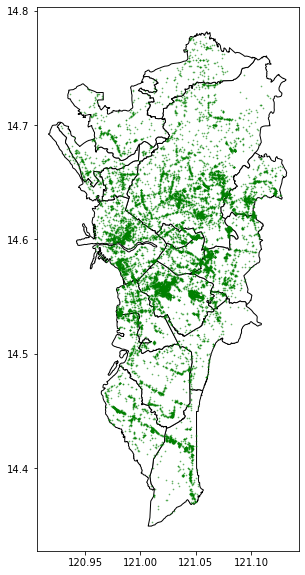

In [13]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(10, 10), color='white', edgecolor='black')
mm_pts.plot(ax=ax, color='green', markersize=.5, alpha=0.5)

<AxesSubplot:>

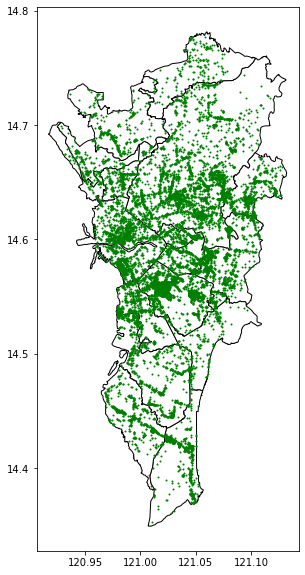

In [14]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(10, 10), color='white', edgecolor='black')
mm_pts.plot(ax=ax, color='green', markersize=1, alpha=1)

<AxesSubplot:>

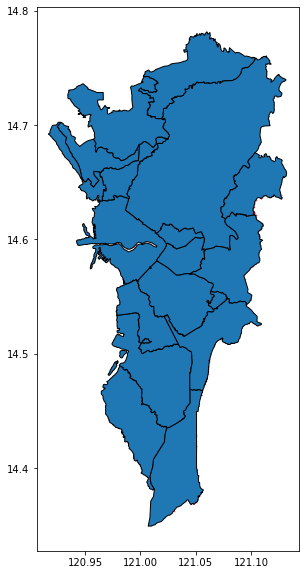

In [15]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_pts.plot(figsize=(10, 10), color='red', markersize=.5, alpha=0.5)
mm_shp.plot(ax=ax, facecolor=None, edgecolor='black')

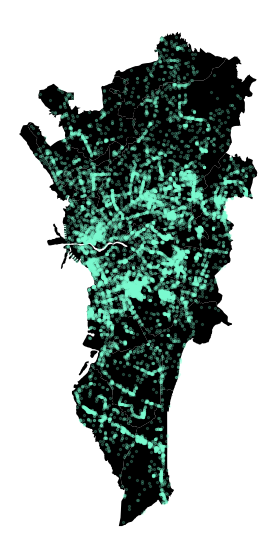

In [16]:
ax = mm_shp.plot(figsize = (10,10), color = 'black')
mm_pts.plot(ax = ax, color = 'aquamarine', markersize = 5, alpha = 0.2)
ax.set_axis_off()

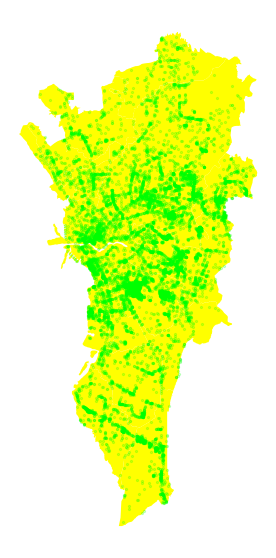

In [17]:
ax = mm_shp.plot(figsize=(10,10), color='yellow')
mm_pts.plot(ax = ax, color='lime', markersize=5, alpha=0.2)
ax.set_axis_off()

In [18]:
# Or we can just filter our points based on what we are specifically looking for. Let's filter it out by 'school':
mm_pts[mm_pts['amenity']=='school']

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
2,255058348,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06861 14.53961)
4,255071432,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06374 14.54548)
6,1993739420,None,None,540,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06692 14.54115)
22,1323171772,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06709 14.54335)
28,255065189,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06726 14.54501)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14885,5309635413,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01940 14.70074)
14887,255049852,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.00379 14.71679)
14894,2525045404,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95895 14.72395)
14895,2525045403,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95854 14.72460)


<AxesSubplot:>

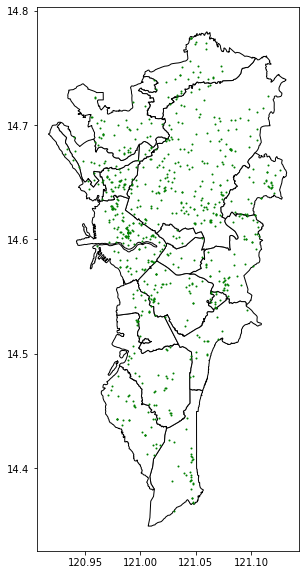

In [19]:
# Showing our school plot:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(10, 10), color='white', edgecolor='black')
mm_pts[mm_pts['amenity']=='school'].plot(ax=ax, color='green', markersize=1, alpha=1)

<AxesSubplot:>

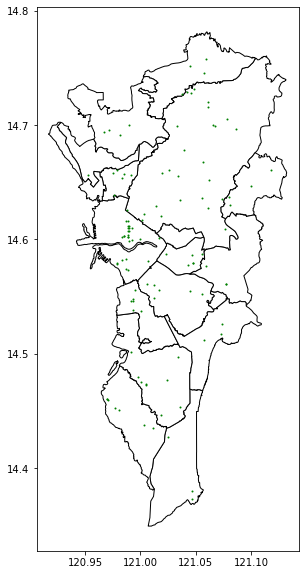

In [20]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(10, 10), color='white', edgecolor='black')
mm_pts[mm_pts['amenity']=='college'].plot(ax=ax, color='green', markersize=1, alpha=1)


#### Note that this is where our Mapping Choices would matter. What would be a better way to map this?

### Exercise
Create a map that shows the restaurants within Makati City.

In [21]:
# Your Code Here
makati_shp = gpd.read_postgis(
'''
SELECT *
FROM gadm.ph_brgy
WHERE name_2 = 'Makati City'
'''
,con = conn, geom_col ='geom'
)
makati_shp

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,nl_name_2,gid_3,name_3,varname_3,nl_name_3,type_3,engtype_3,cc_3,hasc_3,geom
0,24564,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.1_1,Bangkal,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ..."
1,24565,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.2_1,Bel-Air,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ..."
2,24566,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.3_1,Carmona,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01378 14.57440, 121.01385 ..."
3,24567,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.4_1,Cembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04842 14.56279, 121.04831 ..."
4,24568,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.5_1,Comembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.06582 14.54963, 121.06567 ..."
5,24569,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.6_1,Dasmariñas,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ..."
6,24570,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.7_1,East Rembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.05642 14.54991, 121.05632 ..."
7,24571,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.8_1,Forbes Park,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ..."
8,24572,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.9_1,Guadalupe Nuevo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04181 14.56047, 121.04021 ..."
9,24573,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.10_1,Guadalupe Viejo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03281 14.56430, 121.03275 ..."


In [22]:
makati_rest = gpd.read_postgis('''
SELECT p.*
FROM ph_point p
JOIN gadm.ph g ON st_within(p.way, g.geom)
WHERE p.amenity = 'restaurant' AND g.name_2 = 'Makati City'
''', conn, geom_col = 'way')
makati_rest

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,4730680638,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54092)
1,4730680822,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54124)
2,5441764222,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01229 14.54350)
3,244466926,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01858 14.53598)
4,1346621384,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01783 14.53778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1437660247,None,Philplans Corporate Center,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05635 14.56063)
674,1400573068,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05731 14.56005)
675,4528435891,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05080 14.56289)
676,4528435893,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05085 14.56292)


<AxesSubplot:>

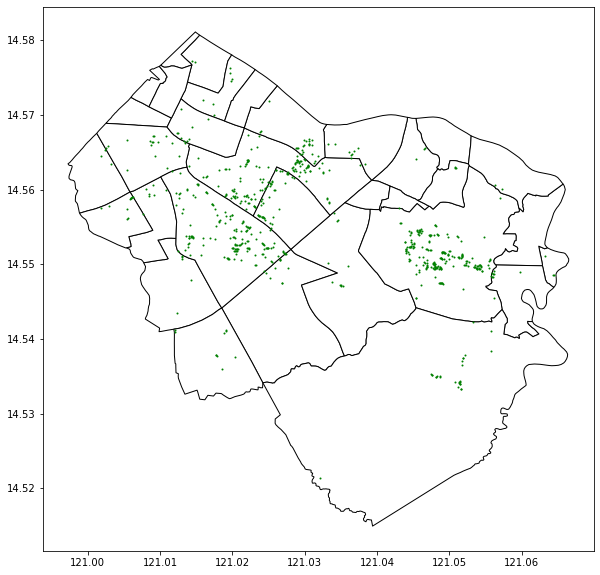

In [23]:
# Showing our school plot:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = makati_shp.plot(figsize=(10, 10), color='white', edgecolor='black')
makati_rest.plot(ax=ax, color='green', markersize=1, alpha=1)

### Merging Data

In [24]:
# Let's read our financial and population data from our last meeting 
fin_pop = pd.read_csv('financial_pop.csv')
fin_pop

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,48163.0,74.045920,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,3573.0,0.115667,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,17115.0,1.736411,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,2501.0,0.273689,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,2088.0,0.643801,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,15.448920,5.801291,165.833472,116.742464,49.091008,0.0,30.375550,40.505854,29.068270,Camarines Sur,Tinambac
1623,NaN,3.881869,2.064453,59.176489,50.055428,9.121061,0.0,0.000000,0.000000,33.135557,Camarines Sur,Camaligan
1624,NaN,4.867135,2.615213,144.692431,100.076373,44.616059,0.0,0.502352,0.502352,106.534443,Camarines Sur,Lagonoy
1625,NaN,5.261260,1.360630,95.936120,61.682604,34.253516,0.0,13.592182,13.949405,40.976700,Camarines Sur,Balatan


In [25]:
# now let's merge it to our mm_shp
mm_data = mm_shp.merge(fin_pop, left_on = ['name_1','name_2'],
                       right_on = ['shp_province','shp_municipality'])

<AxesSubplot:>

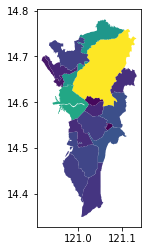

In [26]:
# Now we can use this table to create a choropleth map using population
mm_data.plot(column='pop')

<AxesSubplot:>

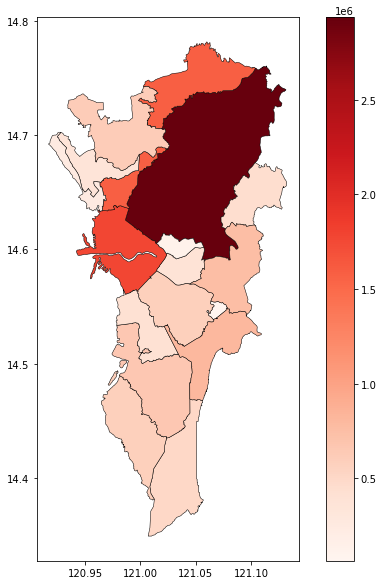

In [27]:
# Again, using matplotlib parameters, we can fix the map to make it more appealing:
# Now we can use this table to create a choropleth map using population
mm_data.plot(column='pop',
             figsize=(10, 10),
             cmap='Reds',
             legend=True,
             edgecolor='black',
             linewidth=0.5)

### Exercise : Create maps for:

1) Visualizing the population density of each province.

2) Identifying the Cities/Municipalites within 14 km from Makati City.

### Density of each province

In [28]:
ph_shp = gpd.read_postgis(""" 
SELECT * FROM gadm.ph
""", con=conn, geom_col='geom')
ph_shp.head(5)

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ..."
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.78956 17.41699, 120.78922 ..."
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.92917 17.41307, 120.92464 ..."


In [29]:
# now let's merge it to our mm_shp
ph_data = ph_shp.merge(fin_pop, left_on = ['name_1'],
                       right_on = ['shp_province'])
ph_data.head(5)

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman


<AxesSubplot:>

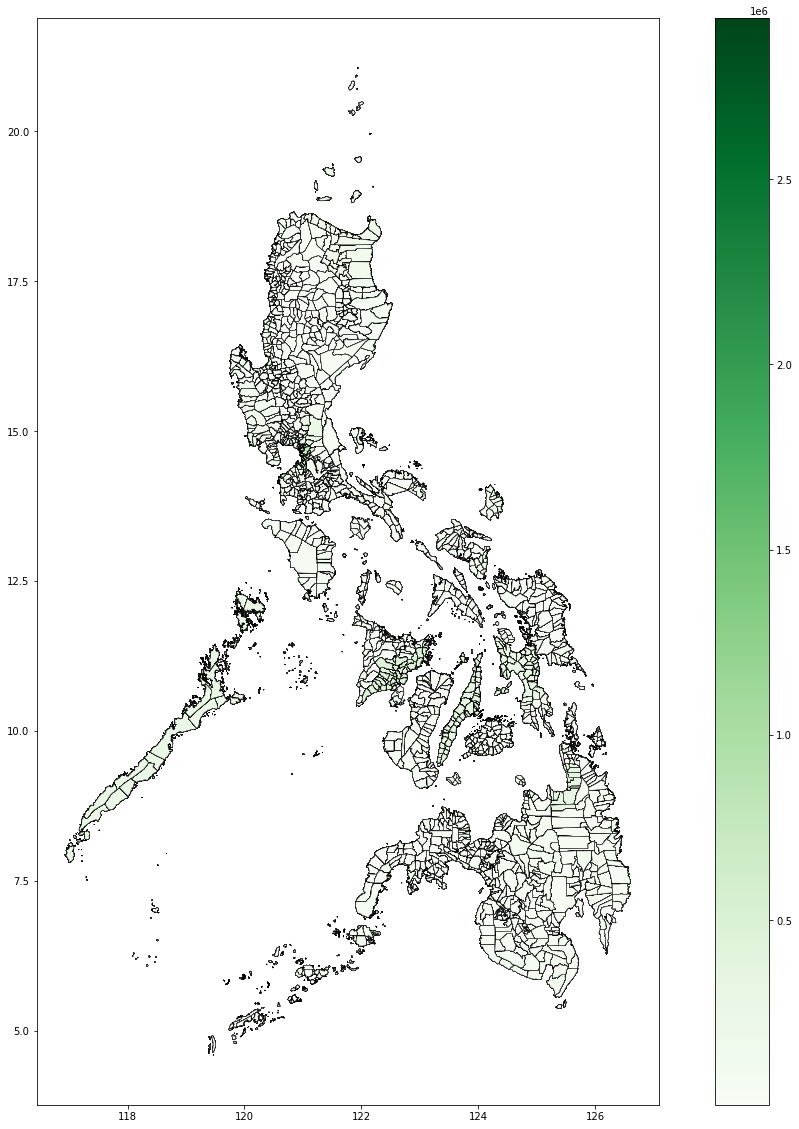

In [30]:
ph_data.plot(column='pop',
             figsize=(20, 20),
             cmap='Greens',
             legend=True,
             edgecolor='black',
             linewidth=0.5)

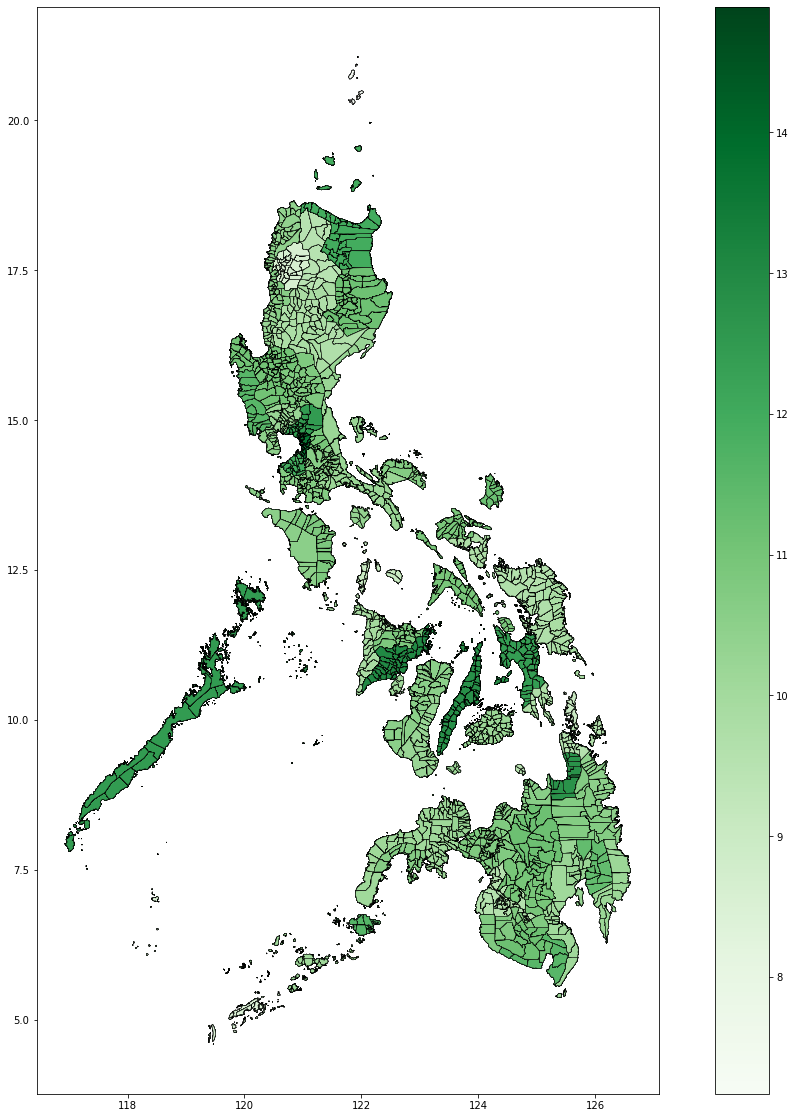

In [31]:
#I tried logging but kernel dies on me
ph_data['logpop'] = np.log1p(ph_data['pop'])
ph_data.plot(column='logpop',
             figsize=(20, 20),
             cmap='Greens',
             legend=True,
             edgecolor='black',
             linewidth=0.5);

### 14 KM within Makati

In [32]:
makati_within_shp = gpd.read_postgis(""" 
    SELECT p2.*
    FROM 
        gadm.ph as p1
    INNER JOIN 
        gadm.ph as p2
    ON
        ST_DWithin(st_transform(p1.geom, 3123), st_transform(p2.geom, 3123)
            , 14000) 
    WHERE
        p1.Name_2 = 'Makati City'
""", con=conn, geom_col='geom')
makati_within_shp

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1345,PHL,Philippines,PHL.64_1,Rizal,None,PHL.64.1_1,Angono,None,None,Bayan|Munisipyo,Municipality,45801,PH.RI.AG,"MULTIPOLYGON (((121.15926 14.52012, 121.15665 ..."
1,294,PHL,Philippines,PHL.17_1,Bulacan,None,PHL.17.15_1,Obando,None,None,Bayan|Munisipyo,Municipality,31414,PH.BU.OA,"MULTIPOLYGON (((120.95783 14.68747, 120.95775 ..."
2,419,PHL,Philippines,PHL.24_1,Cavite,None,PHL.24.3_1,Bacoor,None,None,Bayan|Munisipyo,Municipality,42103,PH.CV.BC,"MULTIPOLYGON (((120.98454 14.36196, 120.97490 ..."
3,421,PHL,Philippines,PHL.24_1,Cavite,None,PHL.24.5_1,Cavite City,None,None,Lungsod|Siyudad,City,42105,PH.CV.CV,"MULTIPOLYGON (((120.87695 14.45306, 120.87722 ..."
4,426,PHL,Philippines,PHL.24_1,Cavite,None,PHL.24.10_1,Imus,None,None,Bayan|Munisipyo,Municipality,42109,PH.CV.IU,"MULTIPOLYGON (((120.91850 14.35753, 120.91826 ..."
5,428,PHL,Philippines,PHL.24_1,Cavite,None,PHL.24.12_1,Kawit,None,None,Bayan|Munisipyo,Municipality,42111,PH.CV.KW,"MULTIPOLYGON (((120.89316 14.42352, 120.88914 ..."
6,766,PHL,Philippines,PHL.40_1,Laguna,None,PHL.40.11_1,Laguna lake,Laguna de bay,None,Waterbody,Waterbody,0,None,"MULTIPOLYGON (((121.46679 14.31635, 121.46597 ..."
7,973,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.13_1,Pateros,None,None,Lungsod|Siyudad,City,137606,PH.MM.PT,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ..."
8,974,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.14_1,Quezon City,None,None,Lungsod|Siyudad,City,137404,PH.MM.QE,"MULTIPOLYGON (((121.01576 14.60610, 121.01511 ..."
9,965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,Lungsod|Siyudad,City,137401,PH.MM.MD,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ..."


In [33]:
makati_shp = gpd.read_postgis(""" 
    SELECT *
    FROM 
        gadm.ph 
    WHERE
        Name_2 = 'Makati City'
""", con=conn, geom_col='geom')
makati_shp

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [ ]:
makati_shp.plot(ax=ax, color='firebrick')
makati_shp['coords'] = makati_shp['geom'].apply(lambda x: x.representative_point().coords[:])
makati_shp['coords'] = [coords[0] for coords in makati_shp['coords']]

makati_within_shp['coords'] = makati_within_shp['geom'].apply(lambda x: x.representative_point().coords[:])
makati_within_shp['coords'] = [coords[0] for coords in makati_within_shp['coords']]

<Figure size 432x288 with 0 Axes>

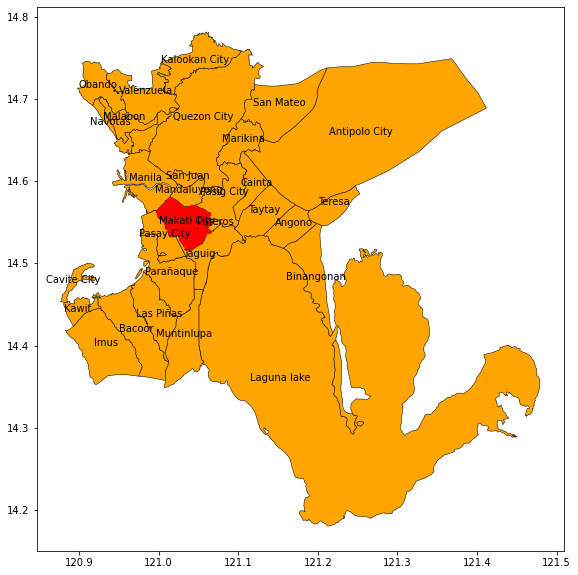

In [34]:
#I can remove laguna lake but I retained it since its within the radius and 
#we don't want to reduce information
#makati_within_shp = makati_within_shp.loc[makati_within_shp['name_2'] != 'Laguna lake']
ax = makati_within_shp.plot(figsize=(10, 10),
                            color='orange',
                            legend=True,
                            edgecolor='black',
                            linewidth=0.5)

for idx, row in makati_within_shp.iterrows():
                plt.annotate(row['name_2'],
                 xy=row['coords'],
                 horizontalalignment='center',
                 fontsize=10)
makati_shp.plot(ax=ax, color='red');